In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount='True')

Mounted at /content/gdrive


In [2]:
!pip install --quiet seaborn

In [3]:
import numpy
import sklearn
from sklearn import manifold
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
#get the optimal prediction
def opt_predictions(row, best_train_cutoff):
  if row['prediction'] > best_train_cutoff:
    opt_pred = 1
  else:
    opt_pred = 0
  return opt_pred

#load the train params back in
def load_params(fpath):
  # Opening JSON file
  with open(fpath) as json_file:
    data = json.load(json_file)
  return data

#plot confusion matrix
def plot_confusion_matrix(labels, predictions, title, ticks, train_params, pred_type, embedding = False):
  #cmap
  cm = confusion_matrix(labels, predictions)
  #sub
  ax = plt.subplot()
  sns.set(font_scale=2.0) # Adjust to fit
  sns.heatmap(cm, annot=True, ax=ax, cmap="binary", fmt="g");
  # Labels, title and ticks
  label_font = {'size':'20'}  # Adjust to fit
  ax.set_xlabel('Predictions', fontdict=label_font);
  ax.set_ylabel('Class Labels', fontdict=label_font);

  title_font = {'size':'20'}  # Adjust to fit
  ax.set_title(title, fontdict=title_font);

  ax.tick_params(axis='both', which='major', labelsize=20)  # Adjust to fit
  ax.xaxis.set_ticklabels(ticks);
  ax.yaxis.set_ticklabels(ticks);

  #save
  if embedding == False:
    plt.savefig(train_params['classification_save_path'] + pred_type + '_image_' + title.replace(' Set', '') +'.png', bbox_inches="tight")
  else:
    plt.savefig(train_params['classification_save_path'] + pred_type + '_embedding_' + title.replace(' Set', '') +'.png', bbox_inches="tight")

  plt.show()

In [5]:
#read in the train and test and verify quickly
df_train = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/class-Symp-BB-AAA-embedding/model1/train-OPT.csv')
df_train_P = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/class-Symp-BB-AAA-embedding/model1/train-Pred.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/class-Symp-BB-AAA-embedding/model1/test-OPT.csv')
df_test_P = pd.read_csv('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/class-Symp-BB-AAA-embedding/model1/test-Pred.csv')
train_params = load_params('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/train_params.json')
#label
df_train_P['DATA'] = 'TRAIN'
df_test_P['DATA'] = 'TEST'
#combine
df = pd.concat([df_train_P, df_test_P])
#quick
df2 = pd.read_pickle('/content/gdrive/MyDrive/AAA_Project/Masters-Thesis/AAA-Wall/results/class-Symp-BB-AAA-Wall-UNet-results/classifier-2022-10-29-21-59/df_results.pkl')


In [6]:
#quick check for training
ls1 = df2[df2['DATA'] == 'TRAIN']['Patient'].to_list()
ls2 = df[df['DATA'] == 'TRAIN']['Patient'].to_list()
for ls in ls1:
  if ls not in ls2:
    print(ls)
#quick check for testing
ls1 = df2[df2['DATA'] == 'TEST']['Patient'].to_list()
ls2 = df[df['DATA'] == 'TEST']['Patient'].to_list()
for ls in ls1:
  if ls not in ls2:
    print(ls)

In [8]:
#get best based on train
best_train_cutoff = df_train.iloc[0]['Cutoff']
print('Train Set')
display(df_train.head(1)) #manually noted as the same!
#display
display(df_train[df_train['Cutoff'] == 0.5])
#display
print('Test Set')
display(df_test[df_test['Cutoff'] == best_train_cutoff])
#display
display(df_test[df_test['Cutoff'] == 0.5])
#update the df results file and save accordingly, then display the classification performance
df['OPT-Prediction'] = df.apply(opt_predictions, axis = 1, args = (best_train_cutoff, ))
#save
df.to_pickle(train_params['classification_save_path'] + 'class-Symp-BB-AAA-embedding/' + 'df_classification.pkl')

Train Set


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
0,0.6,33,5,9,26,0.83871,0.785714,0.742857,0.868421,0.787879,0.808219


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
15,0.5,18,20,0,35,0.636364,1.0,1.0,0.473684,0.777778,0.726027


Test Set


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
4,0.6,17,8,8,17,0.68,0.68,0.68,0.68,0.68,0.68


,Cutoff,True Negative,False Positive,False Negative,True Positive,Precision,Negative Predictive Value,Recall,Specificity,F1,Accuracy
14,0.5,7,18,1,24,0.571429,0.875,0.96,0.28,0.716418,0.62


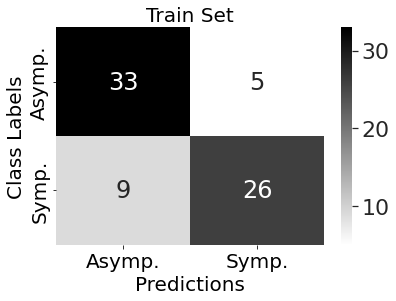

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.82        38
         1.0       0.84      0.74      0.79        35

    accuracy                           0.81        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.81      0.81      0.81        73



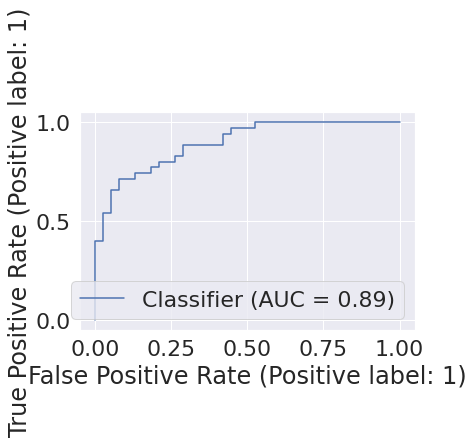

In [9]:
pred_type = 'OPT-Prediction' # 'prediction' for 0.5 'OPT-Prediction' as informed by training set

#train set performance
train_labels = df[df['DATA'] == 'TRAIN']['label'].to_list()
train_predictions = df[df['DATA'] == 'TRAIN'][pred_type].to_list()
train_pos_predictions = df[df['DATA'] == 'TRAIN']['prediction'].to_list()

#results
plot_confusion_matrix(train_labels, train_predictions, title = 'Train Set', ticks = ['Asymp.', 'Symp.'], 
                      train_params = train_params, pred_type = pred_type, embedding = True)

print(sklearn.metrics.classification_report(train_labels, train_predictions))
#print('ROC-AUC Curve: ', sklearn.metrics.roc_auc_score(train_labels, pos_predictions))
RocCurveDisplay.from_predictions(train_labels, train_pos_predictions)
plt.show()

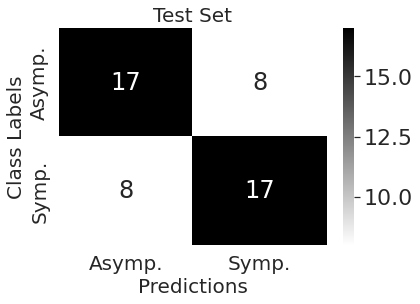

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68        25
         1.0       0.68      0.68      0.68        25

    accuracy                           0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



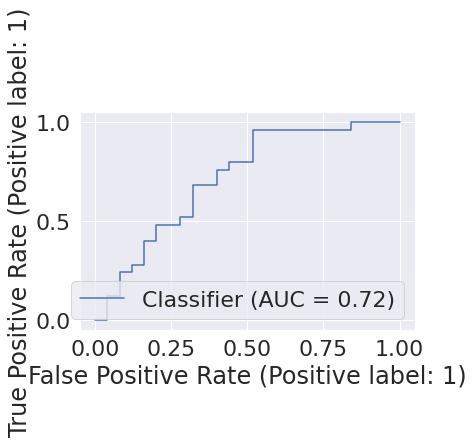

In [10]:
#test set performance
test_labels = df[df['DATA'] == 'TEST']['label'].to_list()
test_predictions = df[df['DATA'] == 'TEST'][pred_type].to_list()
test_pos_predictions = df[df['DATA'] == 'TEST']['prediction'].to_list()

#results
plot_confusion_matrix(test_labels, test_predictions, title = 'Test Set', ticks = ['Asymp.', 'Symp.'], 
                      train_params = train_params, pred_type = pred_type, embedding = True)
print(sklearn.metrics.classification_report(test_labels, test_predictions))
#print('ROC-AUC Curve: ', sklearn.metrics.roc_auc_score(train_labels, pos_predictions))
RocCurveDisplay.from_predictions(test_labels, test_pos_predictions)
plt.show()